# **Demonstration: Training the binary clasification model**
# Import libraries

In [1]:
from pathlib import Path
import json
from CO_BC import CO_BC

# Import default configurations
model_config.json has default hyperparameters for the CO_BC model: 
* number of input features
* nubmer of hidden neurons for each layer
* nubmer of hidden layers
* nubmer of training epochs
* learning rate
* batch size

In [2]:
PACKAGE_PATH = Path.cwd()
with open(PACKAGE_PATH / "model_config.json", "r") as f:
    json_dict = json.load(f)
    CO_BC_config = json_dict["model"]["CO_BC"]
CO_BC_config

{'num_input_features': 0,
 'num_hidden_neurons': [128, 256, 8],
 'num_hidden_layers': 3,
 'num_epochs': 300,
 'learning_rate': 0.001,
 'size_batch': 32}

# Update the config

Input/output paths and training-specific hyperparameters should be updated before traning

* Input paths
    * "input_csv_path_pdf": the path of the input csv file of redshift probability distribution
    * "input_csv_path_photz": the path of the input csv file of photometric redshift
* Output paths
    * "output_pdf_path": the path of the output PDF extension file for saving plots and statistics
    * "output_csv_path": the path of the output csv file for saving predictions
    * "model_path": the path of the bese model to be saved

* Training-specific hyperparameters
    * CO_ratio
    * weights: written in the format of [[range...], [weights...]]
    * train_ratio: the ratio of a training set -- a value in between 0 and 1
    * evaluation: perform base evaluation if set to True
    * evaluation_ratio: the ratio of a base evaluation set -- a value in between 0 and 1

* Others
    * model_no: model number (not a hyperparameter) 



In [3]:
model_name = "model_CO_BC_hsc_SPIDERz_SPIDERz"

# model_name = "model_CO_BC_relz_SPIDERz_SPIDERz"

CO_BC_config.update({
    "input_csv_path_PDF": PACKAGE_PATH / 'data/hsc_EPDF.csv',
    "input_csv_path_photz": PACKAGE_PATH / 'data/hsc_EPDF.csv',

    # "input_csv_path_PDF": PACKAGE_PATH / 'data/relz_EPDF_all.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/relz_EPDF_all.csv',

    "output_pdf_path": PACKAGE_PATH / f'results/results_{model_name}.pdf',
    "output_csv_path": PACKAGE_PATH / f'results/results_{model_name}.csv',
    "model_path": PACKAGE_PATH / f'trained_model/CO_BC/{model_name}.pth',

    # more hyperparamters
    "CO_ratio": 0.1,
    # "weights": [[1, 2], [2, 45]],
    'weights': [[0.7, 1.3, 2], [0.5, 2, 15]],
    "train_ratio": 0.99,

    "evaluation": True,
    "evaluation_ratio": 0.3,
    "model_no": 0,
})

# Train a model

Result of training is printed out and saved in PDF and CSV during the `CO_BC.save_results()` function call

"model_no" is incremented by 1 every trianing, which is specified in the file names of a saved model and a result file, which can be found in `PZ_CO_ID/PZ_CO_ID/results`

best model
Epoch [1/300], Loss: 0.345296025276

best model
Epoch [2/300], Loss: 0.027953386307

Epoch [10/300], Loss: 0.313175976276

best model
Epoch [11/300], Loss: 0.011433461681

Epoch [20/300], Loss: 0.022720610723

Epoch [30/300], Loss: 0.083782166243

Epoch [40/300], Loss: 0.579166769981

Epoch [50/300], Loss: 0.043720386922

Epoch [60/300], Loss: 0.096198201180

Epoch [70/300], Loss: 0.222371533513

Epoch [80/300], Loss: 0.156097024679

best model
Epoch [84/300], Loss: 0.002567196265

Epoch [90/300], Loss: 0.318735152483

best model
Epoch [99/300], Loss: 0.000879771425

Epoch [100/300], Loss: 0.126178115606

Epoch [110/300], Loss: 0.001078526722

Epoch [120/300], Loss: 0.110506474972

Epoch [130/300], Loss: 0.179413989186

best model
Epoch [134/300], Loss: 0.000070370457

Epoch [140/300], Loss: 0.000514568645

Epoch [150/300], Loss: 0.006081738975

best model
Epoch [160/300], Loss: 0.000005181731

Epoch [170/300], Loss: 0.045515980572

Epoch [180/300], Loss: 0.029930878431

Epo

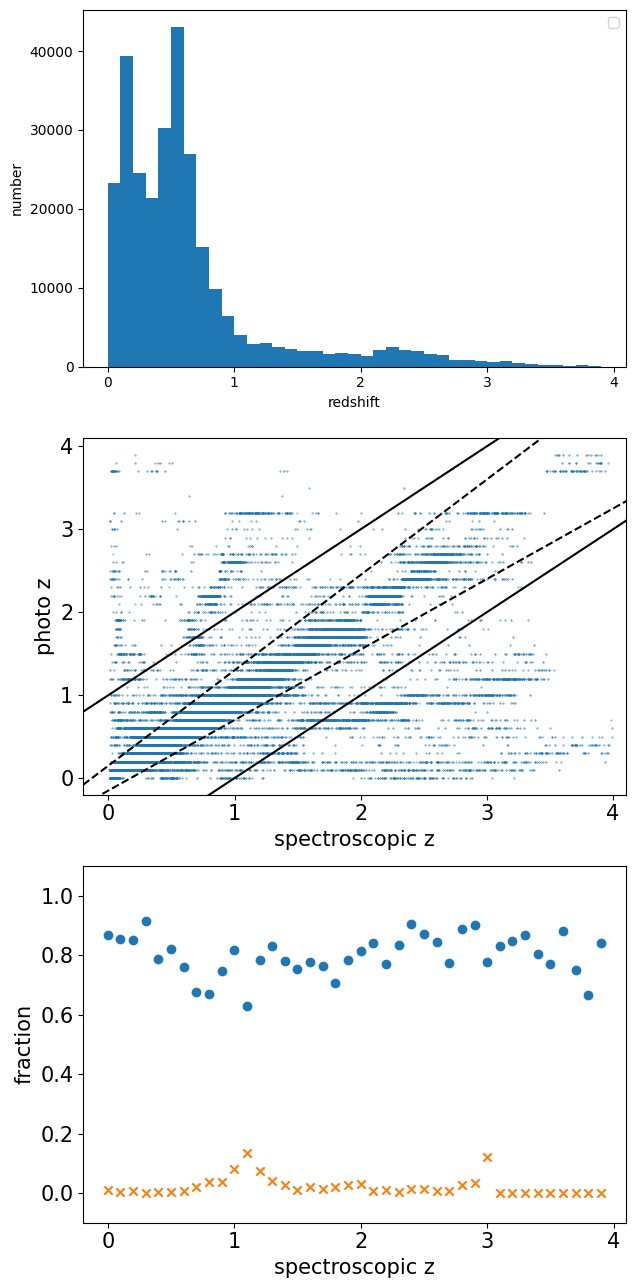

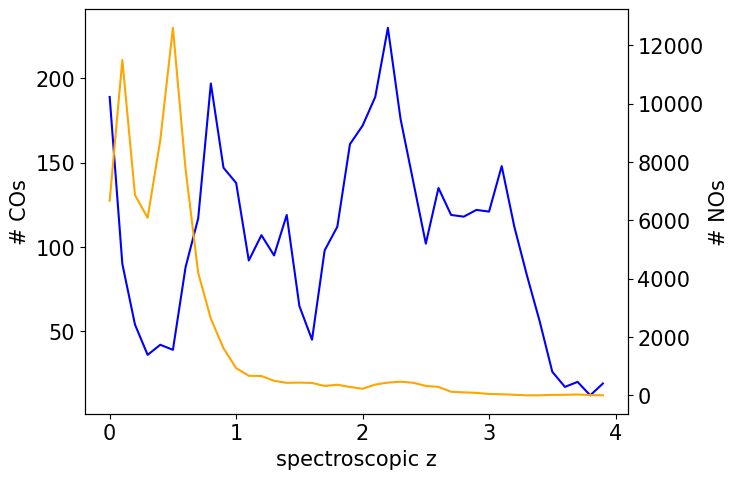

flagged nos > 2:	 1.2928%
flagged nos > 1:	 3.9259%
flagged nos:		 1.0999%
flagged COs:		 80.2026%
NOs:			 90.6799%
COs:			 4.8949%
Saved results to d:\data\유상현\data\2024-2025 Summer Research\github\PZ_CO_ID\PZ_CO_ID\results\results_model_CO_BC_hsc_SPIDERz_SPIDERz.csv


In [4]:
for i in range(1): # change the number to train models for multiple times
    CO_BC_config["model_no"] += 1

    CO_BC_model = CO_BC(**CO_BC_config)

    data = CO_BC_model.preprocess_data()
    dl = CO_BC_model.build_dl(data)
    best_model = CO_BC_model.train_model(dl)
    results = CO_BC_model.evaluate_model(data, dl)
    CO_BC_model.save_results(data, results)